In [43]:
import os,shutil
folders=os.listdir("Images")
folders

['cats', 'dogs', 'horses', 'humans']

In [44]:
for f in folders:
    path="Images/"+f
    print(f+" " +str(len(os.listdir(path))))

cats 202
dogs 202
horses 202
humans 202


In [45]:
if not os.path.isdir('val_images'):
    os.mkdir("val_images")

classes=folders
print(classes)
%ls
    

['cats', 'dogs', 'horses', 'humans']
 Volume in drive C is Windows
 Volume Serial Number is E23E-D7E3

 Directory of C:\Users\Admin\Desktop\datascience\NeuralNetwork\3.Managing large datasets

02-05-2020  10:22    <DIR>          .
02-05-2020  10:22    <DIR>          ..
01-05-2020  13:36    <DIR>          .ipynb_checkpoints
02-05-2020  10:19           187,634 Cats_Dogs_Human_Horses_CNN.ipynb
02-05-2020  10:21    <DIR>          Images
02-05-2020  10:22    <DIR>          val_images
               1 File(s)        187,634 bytes
               5 Dir(s)  322,903,695,360 bytes free


In [46]:
for c in classes:
    p=os.path.join('val_images',c) #val_images/cats
    #print(p)
    if not os.path.isdir(p):
        print(p)
        os.mkdir(p)
        
SPLIT=0.9
for f in os.listdir("Images"):
    path="Images/" +f
    imgs=os.listdir(path)
    
    split_size=int(SPLIT*len(imgs))
    files_to_move=imgs[split_size:]
    print(len(files_to_move))
    print(files_to_move)
    
    
    for img_f in files_to_move:
        src=os.path.join(path,img_f)
        
        dest=os.path.join('val_images/'+f,img_f)
        
        
        shutil.move(src,dest)
        
    
    

val_images\cats
val_images\dogs
val_images\horses
val_images\humans
21
['cat.80.jpg', 'cat.81.jpg', 'cat.82.jpg', 'cat.83.jpg', 'cat.84.jpg', 'cat.85.jpg', 'cat.86.jpg', 'cat.87.jpg', 'cat.88.jpg', 'cat.89.jpg', 'cat.9.jpg', 'cat.90.jpg', 'cat.91.jpg', 'cat.92.jpg', 'cat.93.jpg', 'cat.94.jpg', 'cat.95.jpg', 'cat.96.jpg', 'cat.97.jpg', 'cat.98.jpg', 'cat.99.jpg']
21
['dog.80.jpg', 'dog.81.jpg', 'dog.82.jpg', 'dog.83.jpg', 'dog.84.jpg', 'dog.85.jpg', 'dog.86.jpg', 'dog.87.jpg', 'dog.88.jpg', 'dog.89.jpg', 'dog.9.jpg', 'dog.90.jpg', 'dog.91.jpg', 'dog.92.jpg', 'dog.93.jpg', 'dog.94.jpg', 'dog.95.jpg', 'dog.96.jpg', 'dog.97.jpg', 'dog.98.jpg', 'dog.99.jpg']
21
['horse-80.jpg', 'horse-81.jpg', 'horse-82.jpg', 'horse-83.jpg', 'horse-84.jpg', 'horse-85.jpg', 'horse-86.jpg', 'horse-87.jpg', 'horse-88.jpg', 'horse-89.jpg', 'horse-9.jpg', 'horse-90.jpg', 'horse-91.jpg', 'horse-92.jpg', 'horse-93.jpg', 'horse-94.jpg', 'horse-95.jpg', 'horse-96.jpg', 'horse-97.jpg', 'horse-98.jpg', 'horse-99.jpg']

In [48]:
print("Training Data")
for f in folders:
    path='Images/'+f
    print(f+ " "+str(len(os.listdir(path))))
    
print("\n Validation Data")
for f in folders:
    path='val_images/'+f
    print(f+ " "+str(len(os.listdir(path))))


Training Data
cats 181
dogs 181
horses 181
humans 181

 Validation Data
cats 21
dogs 21
horses 21
humans 21


In [49]:
from keras.preprocessing import image

In [50]:
import matplotlib.pyplot as plt

In [51]:
img_path="Images/cats/cat.1.jpg"
img=image.load_img(img_path)
print(type(img))

<class 'PIL.JpegImagePlugin.JpegImageFile'>


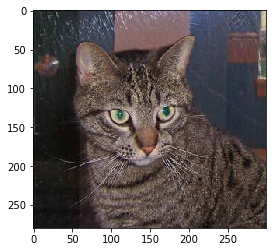

In [52]:
x=image.img_to_array(img)/255.0
plt.imshow(img)

In [53]:
#model
from keras.models import Sequential
from keras.layers import *

In [54]:
model=Sequential()
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(64,(3,3),activation='relu',input_shape=(28,28,1)))

model.add(MaxPooling2D(2,2))
model.add(Convolution2D(128,(3,3),activation='relu',input_shape=(28,28,1)))

model.add(MaxPooling2D(2,2))
model.add(Convolution2D(128,(3,3),activation='relu',input_shape=(28,28,1)))

model.add(MaxPooling2D(2,2))


model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(4,activation='softmax'))

model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)      

In [55]:
#here we will not goint to use model.fit() as the dataset is large
#model.fit() useful when  data sets is small and it can fit inside the memory


from keras import optimizers
adam=optimizers.adam(lr=1e-4)
model.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['acc'])




In [56]:
from keras.preprocessing.image import ImageDataGenerator



In [62]:
train_gen=ImageDataGenerator(rescale=1.0/255)

##gotodirectory-->ReadImage-->Convertintoarray-->255-->Feed.
##important concept
train_generator=train_gen.flow_from_directory(
"Images",
target_size=(150,150),
batch_size=32, ##how many images i want to load
class_mode='categorical')


val_gen=ImageDataGenerator(rescale=1.0/255)

##gotodirectory-->ReadImage-->Convertintoarray-->255-->Feed.
##important concept
val_generator=val_gen.flow_from_directory(
"val_images",
target_size=(150,150),
batch_size=32, ##how many images i want to load
class_mode='categorical')



Found 724 images belonging to 4 classes.
Found 84 images belonging to 4 classes.


In [58]:
train_generator.labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [63]:
train_generator.next() ##data for next batch

(array([[[[0.3254902 , 0.44705886, 0.21568629],
          [0.3529412 , 0.47058827, 0.18039216],
          [0.48627454, 0.5803922 , 0.3529412 ],
          ...,
          [0.36862746, 0.5686275 , 0.30588236],
          [0.36862746, 0.4784314 , 0.2509804 ],
          [0.6       , 0.70980394, 0.36862746]],
 
         [[0.3529412 , 0.47058827, 0.25882354],
          [0.59607846, 0.7137255 , 0.43137258],
          [0.5254902 , 0.61960787, 0.3921569 ],
          ...,
          [0.3254902 , 0.4901961 , 0.20784315],
          [0.3019608 , 0.41176474, 0.18431373],
          [0.5764706 , 0.68235296, 0.37254903]],
 
         [[0.28235295, 0.39607847, 0.20784315],
          [0.52156866, 0.63529414, 0.37254903],
          [0.5647059 , 0.65882355, 0.43137258],
          ...,
          [0.31764707, 0.43921572, 0.14117648],
          [0.43529415, 0.54509807, 0.30588236],
          [0.5294118 , 0.63529414, 0.35686275]],
 
         ...,
 
         [[0.11764707, 0.2509804 , 0.01568628],
          [0.09019

In [64]:
x,y=train_generator.next()
print(x.shape)
print(y.shape)

(32, 150, 150, 3)
(32, 4)


In [65]:
#iterate in this manner also
for x,y in train_generator:
    print(x.shape)
    print(y.shape)
    break
    

(32, 150, 150, 3)
(32, 4)


In [66]:
#train model using train model generator
hist=model.fit_generator(train_generator,
                         epochs=40,
                         steps_per_epoch=7,
                        validation_data=val_generator,
                        validation_steps=4) ##7batches in each epoch as we have 208 images

Epoch 1/40
7/7 [==============================] - 11s 2s/step - loss: 1.3839 - acc: 0.2812 - val_loss: 1.4279 - val_acc: 0.2328
Epoch 2/40
7/7 [==============================] - 9s 1s/step - loss: 1.3875 - acc: 0.3036 - val_loss: 1.3650 - val_acc: 0.3190
Epoch 3/40
7/7 [==============================] - 8s 1s/step - loss: 1.3684 - acc: 0.3160 - val_loss: 1.3023 - val_acc: 0.2788
Epoch 4/40
7/7 [==============================] - 9s 1s/step - loss: 1.3773 - acc: 0.2547 - val_loss: 1.3454 - val_acc: 0.2672
Epoch 5/40
7/7 [==============================] - 9s 1s/step - loss: 1.3641 - acc: 0.2455 - val_loss: 1.3472 - val_acc: 0.2759
Epoch 6/40
7/7 [==============================] - 9s 1s/step - loss: 1.3606 - acc: 0.3482 - val_loss: 1.3722 - val_acc: 0.4712
Epoch 7/40
7/7 [==============================] - 9s 1s/step - loss: 1.3436 - acc: 0.4554 - val_loss: 1.3235 - val_acc: 0.5259
Epoch 8/40
7/7 [==============================] - 9s 1s/step - loss: 1.3114 - acc: 0.4554 - val_loss: 1.2600 -

In [70]:
acc=hist.history['acc']
val_acc=hist.history['val_acc']
loss=hist.history['loss']
val_loss=hist.history['val_loss']

In [68]:
hist.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

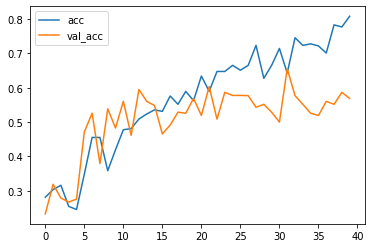

In [71]:
import matplotlib.pyplot as plt
plt.plot(acc,label='acc')
plt.plot(val_acc,label="val_acc")
plt.legend()
plt.show()

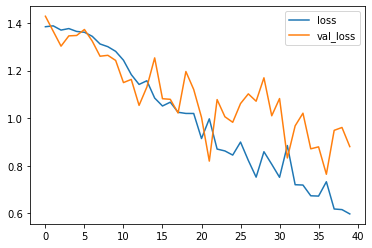

In [72]:
plt.plot(loss,label='loss')
plt.plot(val_loss,label="val_loss")
plt.legend()
plt.show()